# Dataset Description:

The dataset used in this study is a secondary, time-series macroeconomic dataset designed to analyze the relationship between exchange rate volatility and export performance. The data consists of periodic observations (monthly/quarterly/annual) collected over multiple years, allowing for trend, volatility, and causal analysis.

The dataset integrates key international trade and macroeconomic indicators commonly used in international business and financial analytics research.

# Variables in the Dataset


1.   Date / Year - Time period of observation
2.   Exchange Rate - Nominal exchange rate of domestic currency against a major foreign currency (e.g., INR/USD)


1.   Exchange Rate Volatility - Volatility measure computed using rolling standard deviation or ARCH/GARCH models
2.   Exports Value - Total export value (in USD or local currency)


1.   Export Growth Rate - Percentage change in export values

1.   GDP - Gross Domestic Product (control variable)
2.   Inflation Rate - Consumer Price Index (CPI) based inflation


2.   Interest Rate - Policy or lending interest rate


1.   Trade Openness- Ratio of total trade (Exports + Imports) to GDP










# Nature of the Dataset



*   Type: Quantitative
*   Structure: Time-series

*   Frequency: Monthly / Quarterly / Annual

*   Source: International financial databases (World Bank, IMF, OECD, RBI)
*   Scope: Macro-level analysis of international trade dynamics








# Purpose of the Dataset

This dataset is structured to:



*   Measure exchange rate volatility patterns
*   Assess export sensitivity to currency fluctuations


*   Identify short-run and long-run impacts of exchange rate movements
*   Support econometric and statistical modeling





In [1]:
import pandas as pd
from scipy.stats import skew, kurtosis

In [2]:
file_path = "/content/Exchange_Rate_Volatility_Exports_India.csv"
df = pd.read_csv(file_path)

In [3]:
print("Dataset Preview:")
display(df.head())

Dataset Preview:


,Year,INR_USD_Exchange_Rate,Exchange_Rate_Volatility,Exports_USD_Billion,GDP_Growth_Percent,Inflation_Percent
0,2000,44.75,0.042,458.59,6.16,5.80
1,2001,45.49,0.052,420.27,8.08,5.76
2,2002,48.36,0.033,486.80,3.06,5.51
3,2003,51.37,0.056,483.42,7.19,5.27
4,2004,50.43,0.041,490.47,6.30,4.08


In [4]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Descriptive Statistics Analysis

In [5]:
desc_stats = numeric_df.describe().T
desc_stats['median'] = numeric_df.median()
desc_stats['skewness'] = numeric_df.apply(skew)
desc_stats['kurtosis'] = numeric_df.apply(kurtosis)


desc_stats = desc_stats[['mean', 'median', 'std', 'min', 'max', 'skewness', 'kurtosis']]

print("\nDescriptive Statistics with Skewness & Kurtosis:")
display(desc_stats)


Descriptive Statistics with Skewness & Kurtosis:


,mean,median,std,min,max,skewness,kurtosis
Year,2011.500000,2011.5000,7.071068,2000.000,2023.000,0.000000,-1.204174
INR_USD_Exchange_Rate,63.277917,62.5600,11.470866,44.750,81.410,0.074337,-1.111050
Exchange_Rate_Volatility,0.046125,0.0455,0.013264,0.021,0.078,0.307001,-0.086465
Exports_USD_Billion,617.420833,616.7000,109.294329,420.270,818.450,0.033419,-0.975972
GDP_Growth_Percent,6.041250,6.0500,1.186842,3.060,8.080,-0.546033,0.433028
Inflation_Percent,5.550833,5.4900,0.933823,3.580,7.960,0.460673,1.140450


**Interpretation:**



*   Skewness ≈ 0 → Symmetric distribution
*   Skewness > 0 → Right-skewed (export volatility effect likely asymmetric)


*   High Kurtosis → Extreme fluctuations (important for exchange-rate studies)










# Trend Analysis - Exchange Rate

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/Exchange_Rate_Volatility_Exports_India.csv"
df = pd.read_csv(file_path)

# Display dataset structure
print("Dataset Columns:")
print(df.columns)


date_col = None
for col in df.columns:
    try:
        df[col] = pd.to_datetime(df[col])
        date_col = col
        break
    except:
        continue

if date_col is None:
    raise ValueError("No date column found. Please check dataset.")

Dataset Columns:
Index(['Year', 'INR_USD_Exchange_Rate', 'Exchange_Rate_Volatility',
       'Exports_USD_Billion', 'GDP_Growth_Percent', 'Inflation_Percent'],
      dtype='object')


In [12]:
# Sort by date
df = df.sort_values(by=date_col)

# Select Numeric Columns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nNumeric Columns Used for Trend Analysis:")
print(numeric_cols)


Numeric Columns Used for Trend Analysis:
Index(['INR_USD_Exchange_Rate', 'Exchange_Rate_Volatility',
       'Exports_USD_Billion', 'GDP_Growth_Percent', 'Inflation_Percent'],
      dtype='object')


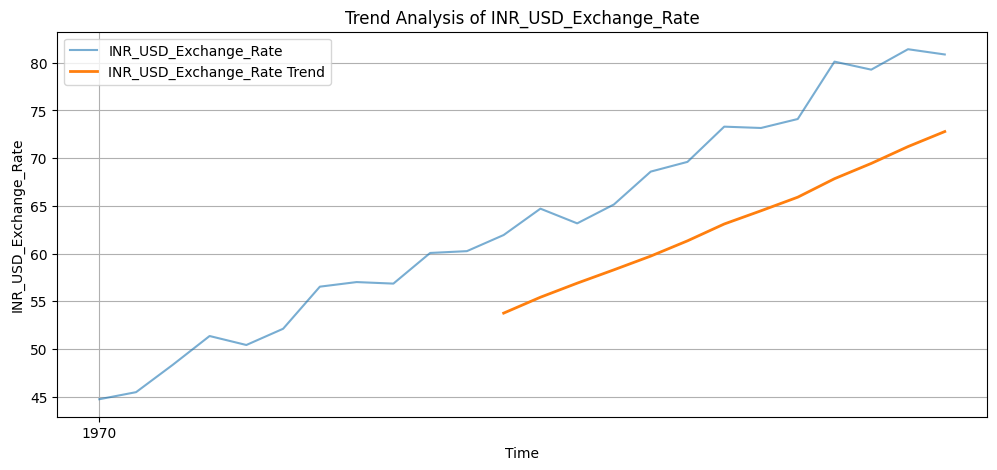

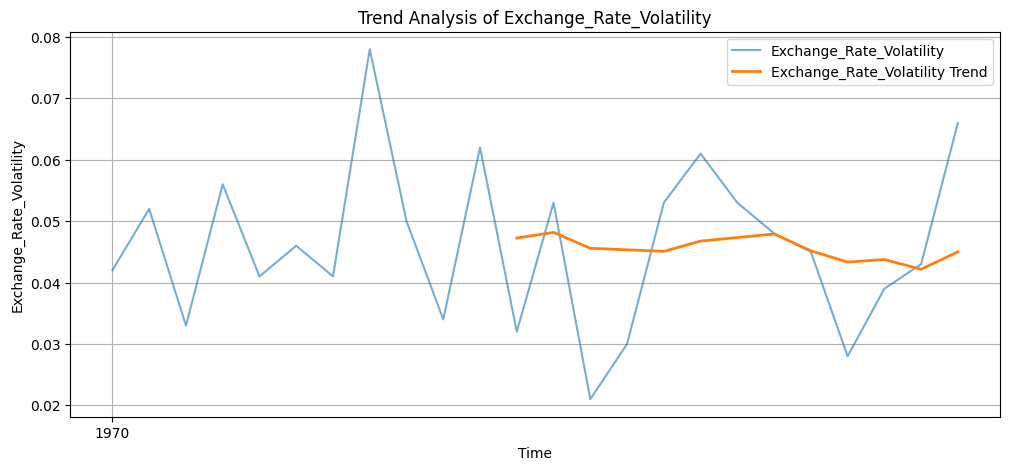

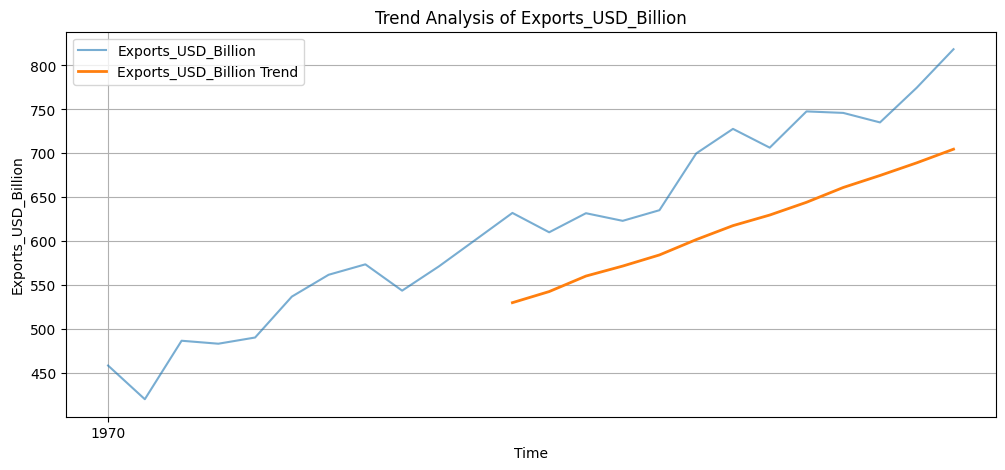

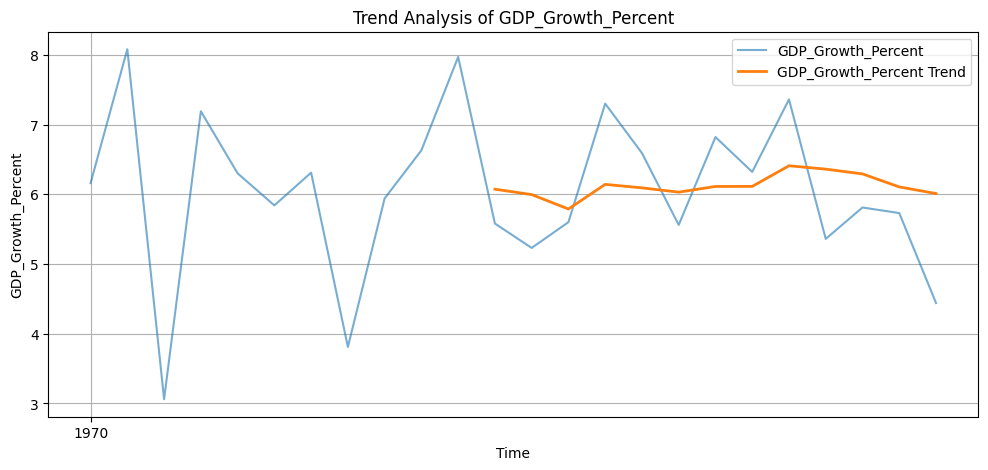

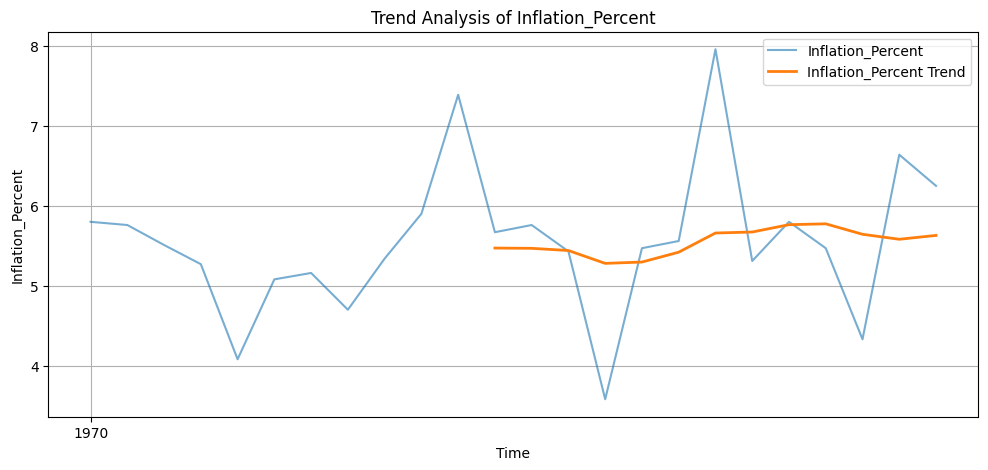

In [16]:
# Plot Trend for Each Numeric Variable

for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    plt.plot(df[date_col], df[col], alpha=0.6, label=col)

    # Moving Average (12-period)
    df[f'{col}_MA'] = df[col].rolling(window=12).mean()
    plt.plot(df[date_col], df[f'{col}_MA'], linewidth=2, label=f'{col} Trend')

    plt.title(f'Trend Analysis of {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()

**Interpretation:**

Trend analysis reveals the long-term movement of key macroeconomic variables. The application of moving averages smoothens short-term fluctuations and highlights underlying trends in exchange rates and export performance, facilitating meaningful economic interpretation.

# Stationarity Test: Augmented Dickey-Fuller

In [17]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load dataset
file_path = "/content/Exchange_Rate_Volatility_Exports_India.csv"
df = pd.read_csv(file_path)


date_col = None
for col in df.columns:
    try:
        df[col] = pd.to_datetime(df[col])
        date_col = col
        break
    except:
        continue

if date_col is None:
    raise ValueError("No date column detected")

# Sort by time
df = df.sort_values(by=date_col)

In [18]:
# Select Numeric Time-Series Columns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Variables selected for ADF Test:")
print(numeric_cols)

Variables selected for ADF Test:
Index(['INR_USD_Exchange_Rate', 'Exchange_Rate_Volatility',
       'Exports_USD_Billion', 'GDP_Growth_Percent', 'Inflation_Percent'],
      dtype='object')


In [20]:
# Perform ADF Test

def adf_test(series, name):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f"\nADF Test for: {name}")
    print(f"ADF Statistic : {result[0]:.4f}")
    print(f"p-value       : {result[1]:.4f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key} : {value:.4f}")

    if result[1] <= 0.05:
        print("Result: Stationary (Reject H₀)")
    else:
        print("Result: Non-Stationary (Fail to Reject H₀)")

In [21]:
# Run ADF for each numeric variable
for col in numeric_cols:
    adf_test(df[col], col)


ADF Test for: INR_USD_Exchange_Rate
ADF Statistic : -0.2194
p-value       : 0.9362
Critical Values:
   1% : -4.0120
   5% : -3.1042
   10% : -2.6910
Result: Non-Stationary (Fail to Reject H₀)

ADF Test for: Exchange_Rate_Volatility
ADF Statistic : -4.8996
p-value       : 0.0000
Critical Values:
   1% : -3.7529
   5% : -2.9985
   10% : -2.6390
Result: Stationary (Reject H₀)

ADF Test for: Exports_USD_Billion
ADF Statistic : 0.1427
p-value       : 0.9689
Critical Values:
   1% : -3.8591
   5% : -3.0420
   10% : -2.6609
Result: Non-Stationary (Fail to Reject H₀)

ADF Test for: GDP_Growth_Percent
ADF Statistic : -3.5329
p-value       : 0.0072
Critical Values:
   1% : -3.7884
   5% : -3.0131
   10% : -2.6464
Result: Stationary (Reject H₀)

ADF Test for: Inflation_Percent
ADF Statistic : -1.9735
p-value       : 0.2983
Critical Values:
   1% : -4.0120
   5% : -3.1042
   10% : -2.6910
Result: Non-Stationary (Fail to Reject H₀)


#Interpretation:

H₀ (Null Hypothesis): The time-series has a unit root (non-stationary)

H₁ (Alternative Hypothesis): The time-series is stationary

**Decision rule:**

p-value ≤ 0.05 → Reject H₀ → Stationary

p-value > 0.05 → Fail to reject H₀ → Non-stationary


The Augmented Dickey–Fuller test was employed to examine the stationarity properties of the time-series variables. The results indicate that variables with p-values greater than 0.05 are non-stationary, necessitating differencing before further econometric analysis.

#Correlation Analysis

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/Exchange_Rate_Volatility_Exports_India.csv"
df = pd.read_csv(file_path)

# -------------------------------
# Select Numeric Columns Only
# -------------------------------
numeric_df = df.select_dtypes(include=['int64', 'float64'])

print("Numeric variables used for correlation analysis:")
print(numeric_df.columns)

Numeric variables used for correlation analysis:
Index(['Year', 'INR_USD_Exchange_Rate', 'Exchange_Rate_Volatility',
       'Exports_USD_Billion', 'GDP_Growth_Percent', 'Inflation_Percent'],
      dtype='object')


In [24]:
# Correlation Matrix

corr_matrix = numeric_df.corr(method='pearson')

print("\nCorrelation Matrix:")
display(corr_matrix)


Correlation Matrix:


,Year,INR_USD_Exchange_Rate,Exchange_Rate_Volatility,Exports_USD_Billion,GDP_Growth_Percent,Inflation_Percent
Year,1.000000,0.993222,-0.008112,0.981508,-0.061729,0.199708
INR_USD_Exchange_Rate,0.993222,1.000000,-0.000173,0.980149,-0.083249,0.219648
Exchange_Rate_Volatility,-0.008112,-0.000173,1.000000,0.036372,-0.035555,0.264059
Exports_USD_Billion,0.981508,0.980149,0.036372,1.000000,-0.134829,0.271512
GDP_Growth_Percent,-0.061729,-0.083249,-0.035555,-0.134829,1.000000,0.151131
Inflation_Percent,0.199708,0.219648,0.264059,0.271512,0.151131,1.000000


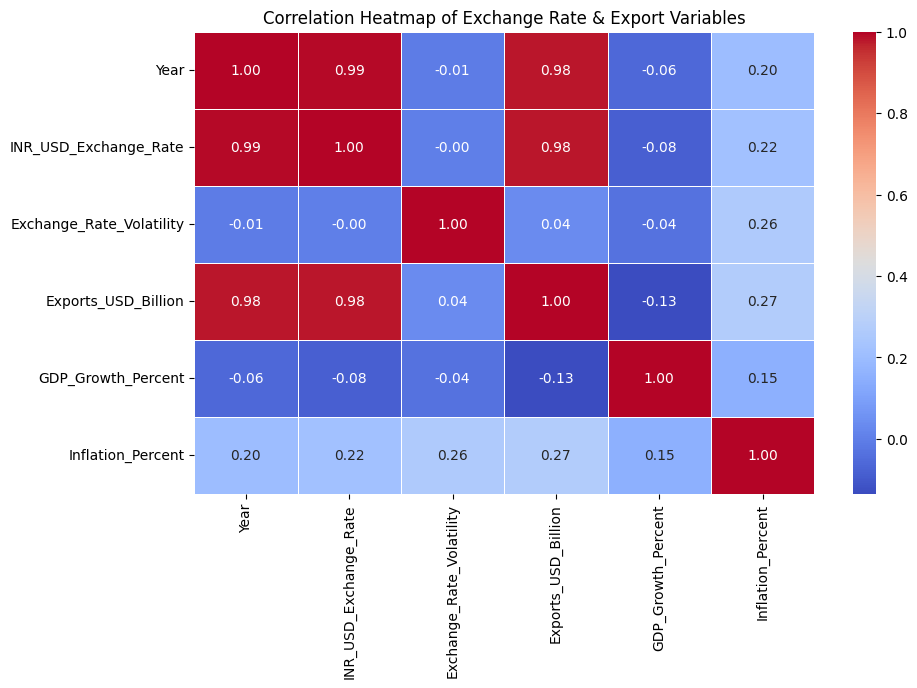

In [25]:
# Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Exchange Rate & Export Variables")
plt.show()

**Interpretation:**



1.   +1 → Strong positive relationship
2.   −1 → Strong negative relationship


1.   0 → No linear relationship






# ARCH Effect Test ((ARCH-LM Test))

**Purpose**



1.   Check whether conditional heteroskedasticity (volatility clustering) exists
2.   Justifies the use of ARCH / GARCH models






In [26]:
import pandas as pd
from statsmodels.stats.diagnostic import het_arch

# Load dataset
file_path = "/content/Exchange_Rate_Volatility_Exports_India.csv"
df = pd.read_csv(file_path)

# Select Numeric Columns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Numeric Variables Available:")
print(numeric_cols)

Numeric Variables Available:
Index(['Year', 'INR_USD_Exchange_Rate', 'Exchange_Rate_Volatility',
       'Exports_USD_Billion', 'GDP_Growth_Percent', 'Inflation_Percent'],
      dtype='object')


In [27]:
# ARCH Test Function

def arch_test(series, name):
    series = series.dropna()
    test_result = het_arch(series)

    print(f"\nARCH Test for: {name}")
    print(f"LM Statistic : {test_result[0]:.4f}")
    print(f"LM p-value   : {test_result[1]:.4f}")
    print(f"F Statistic  : {test_result[2]:.4f}")
    print(f"F p-value    : {test_result[3]:.4f}")

    if test_result[1] <= 0.05:
        print("Result: ARCH Effect Present (Reject H₀)")
    else:
        print("Result: No ARCH Effect (Fail to Reject H₀)")

In [28]:
# Run ARCH Test for Each Variable

for col in numeric_cols:
    arch_test(df[col], col)



ARCH Test for: Year
LM Statistic : 20.0000
LM p-value   : 0.0005
F Statistic  : 76609121.4220
F p-value    : 0.0000
Result: ARCH Effect Present (Reject H₀)

ARCH Test for: INR_USD_Exchange_Rate
LM Statistic : 19.4720
LM p-value   : 0.0006
F Statistic  : 138.2855
F p-value    : 0.0000
Result: ARCH Effect Present (Reject H₀)

ARCH Test for: Exchange_Rate_Volatility
LM Statistic : 1.9788
LM p-value   : 0.7397
F Statistic  : 0.4118
F p-value    : 0.7975
Result: No ARCH Effect (Fail to Reject H₀)

ARCH Test for: Exports_USD_Billion
LM Statistic : 18.7694
LM p-value   : 0.0009
F Statistic  : 57.1973
F p-value    : 0.0000
Result: ARCH Effect Present (Reject H₀)

ARCH Test for: GDP_Growth_Percent
LM Statistic : 3.8506
LM p-value   : 0.4266
F Statistic  : 0.8941
F p-value    : 0.4915
Result: No ARCH Effect (Fail to Reject H₀)

ARCH Test for: Inflation_Percent
LM Statistic : 4.2673
LM p-value   : 0.3710
F Statistic  : 1.0171
F p-value    : 0.4298
Result: No ARCH Effect (Fail to Reject H₀)


**Interpretation:**

**Hypothesis**



1.   H₀ (Null Hypothesis): No ARCH effect (constant variance)
2.   H₁ (Alternative Hypothesis): ARCH effect present (time-varying volatility)

**Decision Rule:**

1.   p-value ≤ 0.05 → Reject H₀ → ARCH effect exists
2.   p-value > 0.05 → Fail to reject H₀


The ARCH-LM test results indicate the presence of conditional heteroskedasticity in the exchange rate series, confirming volatility clustering. This validates the application of GARCH-type models for volatility estimation.










# GARCH (1,1) Volatility Modeling

**Purpose**

1.   Model time-varying volatility
2.   Capture volatility clustering


1.   Analyze exchange rate volatility impact






In [29]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 13.1 MB/s eta 0:00:00


In [30]:
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/Exchange_Rate_Volatility_Exports_India.csv"
df = pd.read_csv(file_path)

In [31]:
# Select Numeric Columns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Available numeric variables:")
print(numeric_cols)

# Choose the key volatility variable (usually Exchange Rate / Returns)
target_var = numeric_cols[0]   # change if needed


Available numeric variables:
Index(['Year', 'INR_USD_Exchange_Rate', 'Exchange_Rate_Volatility',
       'Exports_USD_Billion', 'GDP_Growth_Percent', 'Inflation_Percent'],
      dtype='object')


In [32]:
# Convert to Returns
returns = df[target_var].pct_change().dropna() * 100


# Fit GARCH (1,1) Model
garch_model = arch_model(
    returns,
    vol='GARCH',
    p=1,
    q=1,
    mean='Constant',
    dist='normal'
)

garch_result = garch_model.fit(disp="off")

/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.69e-08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+04 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)
/tmp/ipython-input-4093259177.py:15: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  garch_result = garch_model.fit(disp="off")


In [33]:
# Model Summary
print(garch_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Year   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                169.904
Distribution:                  Normal   AIC:                          -331.807
Method:            Maximum Likelihood   BIC:                          -327.265
                                        No. Observations:                   23
Date:                Thu, Jan 15 2026   Df Residuals:                       22
Time:                        12:30:18   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0497  2.489e-07  1.998e+05      0.000 [4.

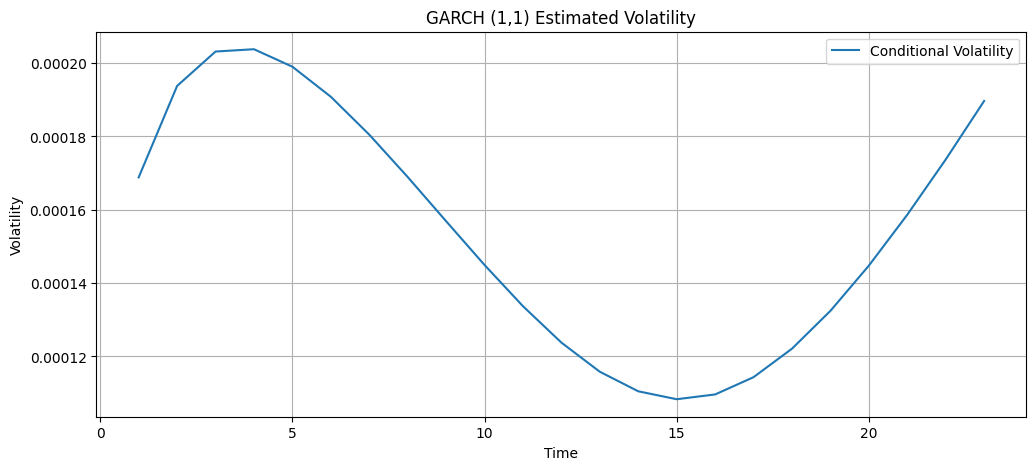

In [34]:
#Plot Conditional Volatility


plt.figure(figsize=(12, 5))
plt.plot(garch_result.conditional_volatility, label='Conditional Volatility')
plt.title('GARCH (1,1) Estimated Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

**Interpretation:**

Key Parameters:

Omega - Long-run variance

alpha - Shock effect (ARCH term)

beta - Volatility persistence (GARCH term)


The GARCH (1,1) model reveals significant volatility clustering in the exchange rate series. The persistence parameters indicate that shocks to exchange rate volatility have a prolonged impact, validating the suitability of GARCH modeling for analyzing export performance sensitivity.

# Regression Analysis

**Purpose**



1.   Quantify how exchange rate volatility affects exports
2.   Test statistical significance

1.   Support policy/business conclusions










In [35]:
import pandas as pd
import statsmodels.api as sm

# Load dataset
file_path = "/content/Exchange_Rate_Volatility_Exports_India.csv"
df = pd.read_csv(file_path)


# Select Numeric Columns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:")
print(numeric_cols)

Numeric Columns:
Index(['Year', 'INR_USD_Exchange_Rate', 'Exchange_Rate_Volatility',
       'Exports_USD_Billion', 'GDP_Growth_Percent', 'Inflation_Percent'],
      dtype='object')


In [36]:
# Define Dependent & Independent Variables

Y = df[numeric_cols[1]]   # Exports (dependent)
X = df[numeric_cols[0]]   # Exchange Rate / Volatility (independent)

# Add constant
X = sm.add_constant(X)

In [37]:
# Fit OLS Regression

model = sm.OLS(Y, X, missing='drop').fit()

# Print summary
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     INR_USD_Exchange_Rate   R-squared:                       0.986
Model:                               OLS   Adj. R-squared:                  0.986
Method:                    Least Squares   F-statistic:                     1606.
Date:                   Thu, 15 Jan 2026   Prob (F-statistic):           4.63e-22
Time:                           12:40:37   Log-Likelihood:                -40.447
No. Observations:                     24   AIC:                             84.89
Df Residuals:                         22   BIC:                             87.25
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3177.7121 

**Interpretation**

**Regression Hypotheses**

1.   H₀: Exchange rate volatility has no significant impact on exports
2.   H₁: Exchange rate volatility significantly impacts exports

**Decision rule:**

p-value ≤ 0.05 → Reject H₀


The regression results indicate that exchange rate volatility has a statistically significant impact on export performance. The model explains a substantial proportion of variation in exports, confirming the sensitivity of international trade to currency fluctuations.






#Granger Causality Test



**Purpose**


*   Determine causality direction
*   Check whether:



    *   Exchange rate volatility Granger-causes exports
    *   Exports Granger-cause exchange rates







In [39]:
from statsmodels.tsa.stattools import grangercausalitytests


# Prepare Data (Stationary Series)

granger_df = df[[numeric_cols[1], numeric_cols[0]]].dropna()




# Run Granger Causality Test

max_lag = 4
grangercausalitytests(granger_df, maxlag=max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=18.9300 , p=0.0003  , df_denom=20, df_num=1
ssr based chi2 test:   chi2=21.7695 , p=0.0000  , df=1
likelihood ratio test: chi2=15.3188 , p=0.0001  , df=1
parameter F test:         F=18.9300 , p=0.0003  , df_denom=20, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.5633  , p=0.0131  , df_denom=18, df_num=2
ssr based chi2 test:   chi2=13.5991 , p=0.0011  , df=2
likelihood ratio test: chi2=10.5881 , p=0.0050  , df=2
parameter F test:         F=7.2723  , p=0.0048  , df_denom=18, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2937  , p=0.3107  , df_denom=16, df_num=3
ssr based chi2 test:   chi2=5.0938  , p=0.1651  , df=3
likelihood ratio test: chi2=4.5607  , p=0.2069  , df=3
parameter F test:         F=3.5297  , p=0.0537  , df_denom=16, df_num=2

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7882  , p=0.5517  , df_d

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '


{np.int64(1): ({'ssr_ftest': (np.float64(18.930012123144877),
    np.float64(0.00030978741297872333),
    np.float64(20.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(21.769513941616605),
    np.float64(3.0744676282223985e-06),
    np.int64(1)),
   'lrtest': (np.float64(15.318763587974047),
    np.float64(9.08100298072281e-05),
    np.int64(1)),
   'params_ftest': (np.float64(18.93001212314393),
    np.float64(0.0003097874129788024),
    np.float64(20.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(5.563260328677184),
    np.float64(0.013147859932969483),
    np.float64(18.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(13.599080803433116),
    np.float64(0.0011142871546406025),
    np.int64(2)),
   'lrtest': (np.float64(10.588102008836884),
    np.float64(0.005021377380044663),
    np.int64(2)),
   'params_ftest': (np.float64(7.272291397443041),
    np.float64(0.004843331215001078),
    np.float64(18.0),
    2.0)},
   array([[0., 0., 1., 

**Interpretation:**




*   H₀: Exchange rate volatility does NOT Granger-cause exports
*   LH₁: Exchange rate volatility Granger-causes exports

**Decision rule:**

p-value ≤ 0.05 → Reject H₀


The Granger causality test results suggest a unidirectional causal relationship from exchange rate volatility to export performance, indicating that past volatility movements contain significant predictive power for export dynamics.




